# Задача 1.

Входной файл содержит сведения о ставках на электронном закрытом аукционе по продаже антиквариата. Аукцион проводится по правилу второй цены: товар получает тот, кто сделал самую большую ставку, но по цене второй по величине ставки. Если ставок меньше двух, то лот остаётся непроданным. Каждый участник делает любое количество заявок на любые лоты.

Определите количество проданных лотов и общую стоимость всех проданных лотов.

**Входные данные**

В первой строке входного файла находится три натуральных числа: $L (1≤L≤1000)$ — количество лотов, $P (1≤P≤1000)$ — количество участников и $N (1≤N≤10000)$ — число заявок.

Следующие $N$ строк содержат номер лота, номер участника и ставку. Запишите в ответе два числа: количество проданных лотов и общую стоимость всех проданных лотов.

Типовой пример организации данных во входном файле:
https://education.yandex.ru/ege/task/370c3c62-7e98-48ed-9d5b-4dc73d6c2b19

```
5 3 6
1 1 10
1 2 15
3 3 3
4 3 10
4 3 7
5 1 5
```

При таких исходных данных лот 1 продан участнику 2 по цене 10, лоты 2, 3 и 5 не проданы, лот 4 продан участнику 3 по цене 7. В итоге проданы лоты 1 и 4 с общей стоимостью 10+7=17. Ответ: 2 17

In [ ]:
data = []
with open('/content/26.txt') as f:
    L, P, N = list(map(int, f.readline().split()))
    for i in range(N):
        data.append(list(map(int, f.readline().split())))

In [ ]:
L, P, N

(724, 813, 5855)

In [ ]:
print(len(data))
data[:5]

5855


[[5, 30, 408250],
 [282, 651, 96600],
 [31, 296, 417250],
 [167, 724, 109850],
 [50, 569, 391750]]

In [ ]:
# Есть аукцион с несколькими лотами. Каждый лот можно купить, делая ставки.
# Побеждает максимальная ставка, но цена покупки — это вторая по величине ставка.

# Если ставок меньше двух, лот не продан.
# Если ставок две или больше, лот получает участник с максимальной ставкой,
# но по цене второй по величине ставки.

# Если нет ставки вообще - то лот также не продан

## Если бы у нас был Pandas (ну вдруг будет)

In [ ]:
# если бы у нас был Pandas
import pandas as pd
# номер лота, номер участника и ставку
# lot number, participant number and delivery
df = pd.DataFrame(data, columns=['lot_id', 'participant_id', 'delivery'])
df

,lot_id,participant_id,delivery
0,5,30,408250
1,282,651,96600
2,31,296,417250
3,167,724,109850
4,50,569,391750
...,...,...,...
5850,447,203,90150
5851,549,804,410150
5852,618,31,369950
5853,643,717,481600


In [ ]:
# Группируем по лоту и сортируем ставки по убыванию
lots = df.groupby("lot_id")["delivery"].apply(lambda x: sorted(x, reverse=True)).reset_index()
lots.head()

,lot_id,delivery
0,0,"[5800, 5600, 5500, 5450, 5450, 5300, 5300, 525..."
1,1,"[443250, 441050, 436150, 426750, 424350, 40990..."
2,2,"[53600, 48300, 47800, 46850, 45800, 45050, 449..."
3,3,"[289250, 284650, 273550, 271650, 269850, 253700]"
4,4,"[154050, 136800, 127300, 118250]"


In [ ]:
lots['len'] = lots['delivery'].apply(len)
lots.head()

,lot_id,delivery,len
0,0,"[5800, 5600, 5500, 5450, 5450, 5300, 5300, 525...",18
1,1,"[443250, 441050, 436150, 426750, 424350, 40990...",15
2,2,"[53600, 48300, 47800, 46850, 45800, 45050, 449...",8
3,3,"[289250, 284650, 273550, 271650, 269850, 253700]",6
4,4,"[154050, 136800, 127300, 118250]",4


In [ ]:
# Количество проданных лотов
lots[lots['len'] > 1].shape
# ответ - 621

(621, 3)

In [ ]:
# Максимальная ставка — это первая в списке, цена продажи — вторая
sold_lots = lots[lots['len'] > 1]

# Берём вторую по величине
sold_lots['price'] = sold_lots['delivery'].apply(lambda x: x[1])

sold_lots

<ipython-input-44-8d43752a1606>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_lots['price'] = sold_lots['delivery'].apply(lambda x: x[1])


,lot_id,delivery,len,price
0,0,"[5800, 5600, 5500, 5450, 5450, 5300, 5300, 525...",18,5600
1,1,"[443250, 441050, 436150, 426750, 424350, 40990...",15,441050
2,2,"[53600, 48300, 47800, 46850, 45800, 45050, 449...",8,48300
3,3,"[289250, 284650, 273550, 271650, 269850, 253700]",6,284650
4,4,"[154050, 136800, 127300, 118250]",4,136800
...,...,...,...,...
642,717,"[130250, 125750, 121950, 115700, 113950, 11210...",7,125750
643,718,"[22900, 21550, 21450, 21350, 20700, 20400, 203...",14,21550
644,719,"[499300, 498650, 480850, 478100, 475900, 46315...",12,498650
645,720,"[206600, 190100, 181300, 170300]",4,190100


In [ ]:
# общую стоимость всех проданных лотов
sold_lots['price'].sum()

# ответ - 170155300
# 621 170155300

170155300

In [ ]:
# можно по другому
# Количество проданных лотов
tmp = df.groupby("lot_id").agg({'participant_id': 'count'}).reset_index()
tmp[tmp['participant_id'] > 1].shape

# Ответ - 621

(621, 2)

## Давайте на решение через excel посмотрим

Решение тут

https://docs.google.com/spreadsheets/d/1jVnjiBD7p_pVX9paZ4y60vmsCr2emmKMiUcwC7-37OY/edit?usp=sharing

1. Создадим excel из txt:

- создаем пустой excel файл
- заходим во вкладку "Данные"
- нажимаем "Получение внешних данных"
- загружаем наш txt
- выбираем разделители пробелы
- помним что первая строка это не данные, значит ее надо убрать, или вместо нее написать названия столбцов

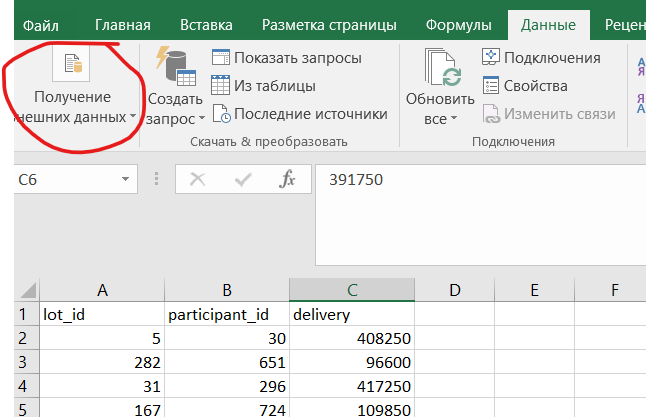

1. Давайте сначала влоб

- Достанем все различные значения из `lot_id` (функция как и в Pandas - `unique(range)`, по-русски она пишется как `УНИК(диапазон поиска)`^

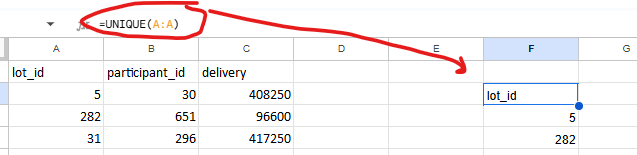

2. Дальше хотим посчитать сколько раз каждый лот был выставлен (нам нужны те, что больше 1 раза):

- Посчитаем сколько раз каждый различный лот встречается в таблице: функция `COUNTIF(range, value)`, по-русски так: `СЧЁТЕСЛИ(диапазон поиска, значение которое считается)`:

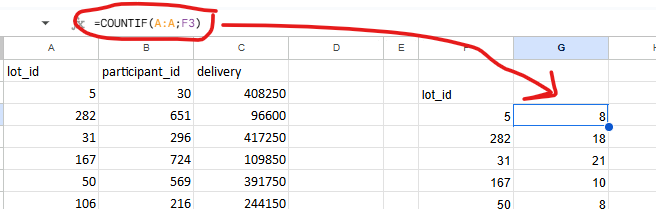

3. Теперь можно просто ручками сделать фильтр и отсортировать значения которые больше 1 раза и посчитать сколько строк.

Это будет ответ на первую часть.

Можно опять же воспользоваться формулой:
`COUNTIF(range, value)`:

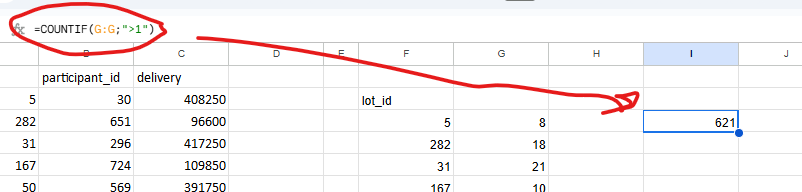

**только теперь тут вместо значения, написано условие в ковычках**

4.

`MAXIFS(столбец, проверяемый_столбец1, условие1, проверяемый_столбец2, условие2)`

- столбец – столбец, в котором ищется максимальное значение.
- проверяемый_столбец1 – столбец, который проверяется на соответствие условию1.
- условие1 – шаблон или условие, которое применяется к столбцу, указанному в аргументе "проверяемый_столбец1". Отфильтровываются все ячейки, соответствующие значению ИСТИНА.
- проверяемый_столбец2 – дополнительные столбцы, которые проверяются на соответствие дополнительным условиям. Отфильтрованный набор значений будет пересечением наборов, созданных каждой парой "условие – столбец".
- условие2 – шаблон или условие, которое применяется к столбцу, указанному в аргументе "проверяемый_столбец2".

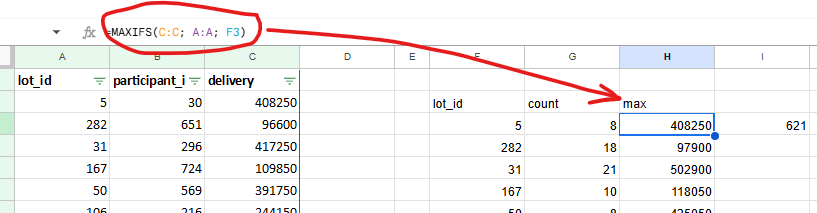

**Это мы нашли максимальну ставку для каждого лота, а теперь нам нужно найти вторую после максимальной**

Воспользуемся функцией `LAGRE(range, k)` или по-русски: `НАИБОЛЬШИЙ(массив;k)`.

Возвращает k-ое по величине значение из множества данных. Эта функция позволяет выбрать значение по его относительному местоположению. Например, функцией НАИБОЛЬШИЙ можно воспользоваться для определения наилучшего, второго или третьего результатов тестирования в баллах.

`LARGE` ищет в некотором массиве в нужном столбце наибольшее значение определенного порядка (первое максимальное, второе и т д)

Подмассив тут берется простым фильтром

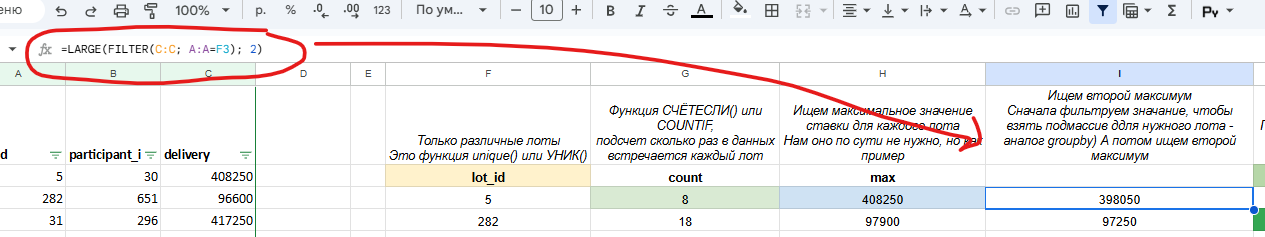

## Теперь давайте кодом решим

In [ ]:
data = []
with open('/content/26.txt') as f:
    L, P, N = list(map(int, f.readline().split()))
    for i in range(N):
        data.append(list(map(int, f.readline().split())))

In [ ]:
data[:5]

[[5, 30, 408250],
 [282, 651, 96600],
 [31, 296, 417250],
 [167, 724, 109850],
 [50, 569, 391750]]

In [ ]:
lots = dict()
# lost = {}
# проходим по каждой строке
for i in data:
    # если текущего lot_id нет еще в нашем словаре, то добавляем
    if i[0] not in lots:
        # Создаём пустой список для лота,
        # в этот список будем ставки потом складывать
        lots[i[0]] = []
    lots[i[0]].append(i[2])  # Добавляем ставку

lots

{5: [408250, 376300, 379650, 368300, 387600, 398050, 355350, 366950],
 282: [96600,
  84400,
  85400,
  83800,
  82600,
  95750,
  95100,
  97900,
  94850,
  89400,
  88750,
  90200,
  97250,
  88000,
  81950,
  86350,
  91750,
  85250],
 31: [417250,
  383450,
  464950,
  420000,
  465600,
  454800,
  459050,
  444100,
  445850,
  375750,
  480500,
  424800,
  438000,
  425550,
  421550,
  468650,
  443500,
  465500,
  390550,
  404500,
  502900],
 167: [109850,
  103100,
  116400,
  118050,
  111150,
  98000,
  112300,
  110900,
  115050,
  109300],
 50: [391750, 386850, 368900, 358500, 396200, 359000, 340900, 425050],
 106: [244150,
  235200,
  225100,
  236400,
  253150,
  246100,
  256100,
  226550,
  211050,
  228850,
  242850],
 161: [86150,
  88450,
  99300,
  92650,
  93550,
  92550,
  100400,
  100550,
  94050,
  105050,
  91050,
  92300],
 41: [355750,
  408150,
  312450,
  347000,
  353000,
  326900,
  340250,
  372300,
  378150,
  320100,
  373500],
 681: [300800,
  315900

In [ ]:
%%time

lots = dict()
# lost = {}
# проходим по каждой строке
for i in data:
    # если текущего lot_id нет еще в нашем словаре, то добавляем
    if i[0] not in lots:
        # Создаём пустой список для лота,
        # в этот список будем ставки потом складывать
        lots[i[0]] = []
    lots[i[0]].append(i[2])  # Добавляем ставку

sold_lots = 0
total_price = 0
# теперь возьмем только у которых больше 1 ставки
for lot, prices in lots.items():
    if len(prices) > 1:  # Лот продан, если больше 1 ставки
        prices.sort(reverse=True)  # Сортируем по убыванию
        sold_lots += 1
        total_price += prices[1]  # Вторая по величине ставка

sold_lots, total_price

CPU times: user 2.37 ms, sys: 0 ns, total: 2.37 ms
Wall time: 2.38 ms


(621, 170155300)

In [ ]:
%%time
a = []

with open('26.txt', 'r') as f:
    l, p, n = list(map(int, f.readline().split()))
    for i in range(n):
        a.append(list(map(int, f.readline().split())))


for i in range(n+1):
    for j in range(n-1):
        if a[j][0] > a[j+1][0]:
            a[j], a[j+1] = a[j+1], a[j]
        elif a[j][0] == a[j+1][0]:
            if a[j][2] < a[j+1][2]:
                a[j], a[j + 1] = a[j + 1], a[j]

b = []
f = 1
for i in range(1, n):
    if f and a[i-1][0] == a[i][0]:
        b.append(a[i][2])
        f = 0
    elif a[i-1][0] != a[i][0]:
        f = 1

print(len(b))
print(sum(b))

621
170155300
CPU times: user 15 s, sys: 0 ns, total: 15 s
Wall time: 15.1 s


# Задача 2.

В 2017 году на прямоугольном участке посадили деревья. В 2023 году, чтобы подсчитать прижившиеся деревья, их сфотографировали с высоты птичьего полёта.

Информация об этих деревьях хранится в файле в виде пар чисел в каждой строке: сначала координата по вертикали, потом по горизонтали. Обе координаты — натуральные числа от 1 до 100.

Определите два самых длинных участка с неприжившимися деревьями, которые ограничены с двух сторон прижившимися деревьями: один в каком-либо ряду, другой — в столбце.

В ответе запишите две максимальные длины участка: сначала ответ для рядов, потом для столбцов.

Пример исходных данных.
```
5 2
9 5
2 5
7 5
7 3
3 9
8 4
2 4
6 5
3 6
```
Для такого набора ответом будут числа 2 и 5.

В третьем ряду между прижившимся 6 и 9 получается два пустых места. В четвёртом столбце между 2 и 8 — пять мест.

Ссылка на данные: https://education.yandex.ru/ege/task/b3da01e1-3361-45f4-ad1d-8f54a80fdfe4

## Решение чистым кодом

In [ ]:
data = []

with open('/content/26 (1).txt') as f:
    for line in f:
        data.append(list(map(int, line.split())))

data[:6]

[[18, 95], [54, 96], [10, 9], [68, 92], [36, 59], [96, 55]]

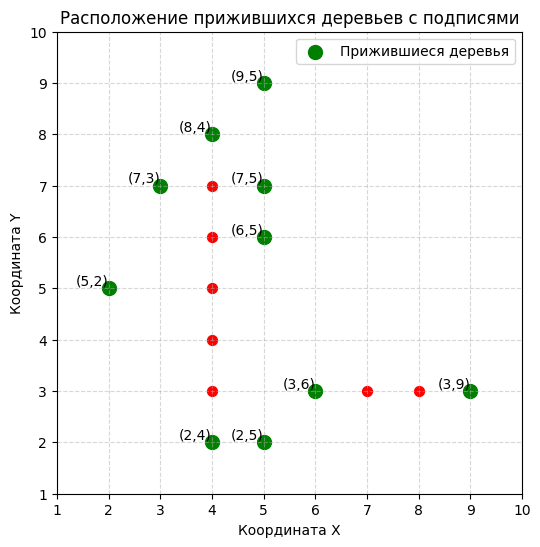

In [ ]:
import matplotlib.pyplot as plt

alive_trees = [(5, 2), (9, 5), (2, 5), (7, 5), (7, 3),
               (3, 9), (8, 4), (2, 4), (6, 5), (3, 6)]

# сначала координата по вертикали, потом по горизонтали
y_alive, x_alive = zip(*alive_trees)

plt.figure(figsize=(6, 6))
plt.scatter(x_alive, y_alive, color="green", s=100, label="Прижившиеся деревья")

# подписи координат
for y, x in alive_trees:
    plt.text(x, y, f"({y},{x})", fontsize=10, ha="right", va="bottom", color="black")

# 5. Оформляем график
plt.scatter([7, 8, 4, 4, 4, 4, 4], [3, 3, 3, 4, 5, 6, 7], color="red", s=50)
plt.xticks(range(1, 11))  # Оси от 1 до 10
plt.yticks(range(1, 11))
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Координата X")
plt.ylabel("Координата Y")
plt.title("Расположение прижившихся деревьев с подписями")
plt.legend()

plt.show()

In [ ]:
data[:5]

[[18, 95], [54, 96], [10, 9], [68, 92], [36, 59]]

In [ ]:
# Группируем по строкам
rows = {}  # ключ — номер строки (y), значение — список координат x в этой строке

for y, x in data:
    if y not in rows:
        rows[y] = []
    rows[y].append(x)

In [ ]:
# Проверим, что получилось
for row in sorted(rows.keys()):
    print(f"Строка {row}: {sorted(rows[row])}")
    # break

Строка 1: [2, 4, 5, 13, 24, 25, 27, 27, 28, 30, 34, 34, 36, 37, 46, 53, 68, 68, 70, 72, 73, 74, 75, 76, 79, 80, 80, 82, 86, 97]


In [ ]:
max_gap_rows = 0
for y in sorted(rows.keys()):  # Проходим по строкам
    x_coords = sorted(rows[y])  # Сортируем координаты X в этой строке

    # Проверяем разрывы между соседними деревьями
    for i in range(1, len(x_coords)):
        gap = x_coords[i] - x_coords[i - 1] - 1  # Количество пустых мест между деревьями
        max_gap_rows = max(max_gap_rows, gap)  # Обновляем максимальный разрыв

max_gap_rows

25

In [ ]:
# тоже самое но для столбца
# Группируем по строкам
columns = {}  # ключ — номер строки (y), значение — список координат x в этой строке

for y, x in data:
    if x not in columns:
        columns[x] = []
    columns[x].append(y)

max_gap_cols = 0
for x in sorted(columns.keys()):  # Проходим по строкам
    y_coords = sorted(columns[x])  # Сортируем координаты X в этой строке

    # Проверяем разрывы между соседними деревьями
    for i in range(1, len(y_coords)):
        gap = y_coords[i] - y_coords[i - 1] - 1  # Количество пустых мест между деревьями
        max_gap_cols = max(max_gap_cols, gap)  # Обновляем максимальный разрыв

max_gap_cols

30

In [ ]:
# Ответ: 25 30

## ИЗИ решение на Pandas

In [ ]:
import pandas as pd

df = pd.read_csv("26 (1).txt", sep=" ", names=["y", "x"])

# Группируем по строкам и ищем максимальные разрывы
def max_gap(series):
    # сортируем координаты
    sorted_values = sorted(series)
    max_gap = 0
    for i in range(1, len(sorted_values)):  # Проходим по отсортированным значениям
        gap = sorted_values[i] - sorted_values[i - 1] - 1  # Находим разрыв
        max_gap = max(max_gap, gap)  # Обновляем максимальный разрыв, если нужно
    return max_gap

max_row_gap = df.groupby("y")["x"].apply(max_gap).max()

# 3. Группируем по столбцам и ищем разрывы
max_col_gap = df.groupby("x")["y"].apply(max_gap).max()

print(max_row_gap, max_col_gap)

25 30


# Задача 3

На производстве штучных изделий $N$ деталей должны быть отшлифованы и окрашены. Для каждой детали известно время её шлифовки и время окрашивания. Детали пронумерованы начиная с единицы. Параллельная обработка деталей не предусмотрена.

На ленте транспортёра есть $N$ мест для каждой из $N$ деталей.

На ленте транспортёра детали располагают так:
- все $2N$ чисел, обозначающих время окрашивания и шлифовки для $N$ деталей, упорядочивают по возрастанию
- если минимальное число в этом упорядоченном списке обозначает время шлифовки конкретной детали, деталь размещают на ленте транспортёра на первое свободное место от её начала
- если минимальное число обозначает время окрашивания, деталь размещают на первое свободное место от конца ленты транспортёра
- если число обозначает время окрашивания или шлифовки уже рассмотренной детали, его не принимают во внимание

Этот алгоритм применяется последовательно для размещения всех $N$ деталей.

Определите номер последней детали, для которой будет определено её место на ленте транспортёра, и количество деталей, которые будут отшлифованы до неё.

**Входные данные**

В первой строке входного файла находится натуральное число $N (N <1000)$ — количество деталей. Следующие $N$ строк содержат пары чисел, обозначающих соответственно время шлифовки и время окрашивания конкретной детали (все числа натуральные, различные).

Запишите в ответе два натуральных числа: сначала номер последней детали, для которой будет определено её место на ленте транспортёра, затем количество деталей, которые будут отшлифованы до неё.

Пример организации данных во входном файле
```
5
30 50
100 155
150 170
10 160
120 55
```
При таких исходных данных порядок расположения деталей на ленте транспортёра — 4, 1, 2, 3, 5. Последней займёт своё место на ленте транспортёра деталь 3. При этом до неё будут отшлифованы три детали.

Пример носит иллюстративный характер. Чтобы выполнить задание, используйте данные из прилагаемых файлов.

Ссылка: https://education.yandex.ru/ege/task/d64cb90b-7c95-42aa-aa06-e68dd23a9b39

In [ ]:
details = []
with open('/content/26 (2).txt') as f:
    N = int(f.readline())
    for i in range(N):
        shlifovka, okrashivanie = map(int, f.readline().split())
        details.append((shlifovka, okrashivanie, i + 1))

details[:3]

[(5163, 1783, 1), (463, 2718, 2), (1555, 4104, 3)]

In [ ]:
details = [(30, 50, 1),
        (100, 155, 2),
        (150, 170, 3),
        (10, 160, 4),
        (120, 55, 5)]

# Все времена шлифовки и окрашивания
events = []
for shlifovka, okrashivanie, idx in details:
    events.append((shlifovka, 'shlifovka', idx))  # Время шлифовки
    events.append((okrashivanie, 'okrashivanie', idx))  # Время окрашивания

events
# Алгоритм состоит в том, чтобы сортировать все события по времени и по типу.

[(30, 'shlifovka', 1),
 (50, 'okrashivanie', 1),
 (100, 'shlifovka', 2),
 (155, 'okrashivanie', 2),
 (150, 'shlifovka', 3),
 (170, 'okrashivanie', 3),
 (10, 'shlifovka', 4),
 (160, 'okrashivanie', 4),
 (120, 'shlifovka', 5),
 (55, 'okrashivanie', 5)]

In [ ]:
events.sort()

events
# порядок расположения деталей на ленте транспортёра — 4, 1, 2, 3, 5
# это из примера
# и у нас также
(10, 'shlifovka', 4) - (30, 'shlifovka', 1)

[(10, 'shlifovka', 4),
 (30, 'shlifovka', 1),
 (50, 'okrashivanie', 1),
 (55, 'okrashivanie', 5),
 (100, 'shlifovka', 2),
 (120, 'shlifovka', 5),
 (150, 'shlifovka', 3),
 (155, 'okrashivanie', 2),
 (160, 'okrashivanie', 4),
 (170, 'okrashivanie', 3)]

In [ ]:
# (10, 'shlifovka', 4)

# Это событие шлифовки для детали 4.
# Мы размещаем её на первом свободном месте с начала:
# Размещаем деталь 4 на первом месте для шлифовки.

# (30, 'shlifovka', 1)
# Это событие шлифовки для детали 1.
# Мы размещаем её на следующем свободном месте с начала:
# Размещаем деталь 1 на втором месте для шлифовки.

# (50, 'okrashivanie', 1)
# Это событие для окращивания
# размещаем на первом месте с конца

In [ ]:
# 4 1

In [ ]:
events[-1]

(6159, 'shlifovka', 724)

In [ ]:
transporter = [None] * (2 * N)  # Лента на 2 * N мест (N шлифовок и N окрашиваний)
transporter[:3]

[None, None, None, None, None]

In [ ]:
num_shlifovka = 0
last_detail_idx = -1
shlifovka_places = [None] * N  # Места для шлифовки
okrashivanie_places = [None] * N  # Места для окрашивания

for time, event_type, idx in events:
    if event_type == 'shlifovka':  # Если это шлифовка
        # Находим первое свободное место с начала для шлифовки
        for i in range(N):
            if shlifovka_places[i] is None:  # Если место свободно
                shlifovka_places[i] = idx
                num_shlifovka += 1
                last_detail_idx = idx  # Обновляем последнюю деталь
                break
    elif event_type == 'okrashivanie':  # Если это окрашивание
        # Находим первое свободное место с конца для окрашивания
        for i in range(N-1, -1, -1):
            if okrashivanie_places[i] is None:  # Если место свободно
                okrashivanie_places[i] = idx
                break

# Ответ: Номер последней детали и количество отшлифованных до неё
print(last_detail_idx, num_shlifovka)
# Ответ: 895 488

724 997
